###Daniyal Rahim d07605

In [0]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext, SparkSession

#sc is the Spark Context already available at databricks, so we do not need to create it again.
#sc = SparkContext()
# sqlContext = SQLContext(sc)

# from pyspark.sql import SparkSession
sqlContext = SparkSession.builder.appName('abc').getOrCreate()

# Creating RDD (Resilient Distributed Dataset) - fundamental data structure of Spark

In [0]:
products = sc.textFile("/FileStore/tables/SalesData.txt")

In [0]:
products.first()

Out[3]: 'ProductID\tName\tProductNumber\tColor\tStandardCost\tListPrice\tSize\tWeight\tProductCategoryID\tProductModelID\tSellStartDate\tSellEndDate\tDiscontinuedDate\tThumbNailPhoto\tThumbnailPhotoFileName\trowguid\tModifiedDate'

In [0]:
print("The data has {} columns".format(len(products.first().split("\t"))))
header = products.first().split("\t")
header

The data has 17 columns
Out[10]: ['ProductID',
 'Name',
 'ProductNumber',
 'Color',
 'StandardCost',
 'ListPrice',
 'Size',
 'Weight',
 'ProductCategoryID',
 'ProductModelID',
 'SellStartDate',
 'SellEndDate',
 'DiscontinuedDate',
 'ThumbNailPhoto',
 'ThumbnailPhotoFileName',
 'rowguid',
 'ModifiedDate']

In [0]:
head = products.first()
content = products.filter(lambda line: line != head)

In [0]:
content.first()

Out[12]: '680\tHL Road Frame - Black, 58\tFR-R92B-58\tBlack\t1059.31\t1431.50\t58\t1016.04\t18\t6\t1998-06-01 00:00:00.000\tNULL\tNULL\t0x47494638396150003100F70000000000800000008000808000000080800080008080808080C0C0C0FF000000FF00FFFF000000FFFF00FF00FFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000\tno_image_available_small.gif\t43DD68D6-14A4-461F-9069-55309D90EA7E\t2004-03-11 10:01:36.827'

In [0]:
content.map(lambda line: len(line.split("\t"))).distinct().collect()[0]

Out[13]: 17

# Example of RDD using Scala

In [0]:
rdd1 = (content.filter(lambda line: line.split("\t"))
 .map(lambda line: (line.split("\t")))
)
rdd1.take(1)

Out[14]: [['680',
  'HL Road Frame - Black, 58',
  'FR-R92B-58',
  'Black',
  '1059.31',
  '1431.50',
  '58',
  '1016.04',
  '18',
  '6',
  '1998-06-01 00:00:00.000',
  'NULL',
  'NULL',
  '0x47494638396150003100F70000000000800000008000808000000080800080008080808080C0C0C0FF000000FF00FFFF000000FFFF00FF00FFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
  'no_image_available_small.gif',
  '43DD68D6-14A4-461F-9069-55309D90EA7E',
  '2004-03-11 10:01:36.827']]

# Converting RDD into Spark Dataframe

In [0]:
df = rdd1.toDF(header)
df.show()

+---------+--------------------+-------------+-----+------------+---------+----+-------+-----------------+--------------+--------------------+--------------------+----------------+--------------------+----------------------+--------------------+--------------------+
|ProductID|                Name|ProductNumber|Color|StandardCost|ListPrice|Size| Weight|ProductCategoryID|ProductModelID|       SellStartDate|         SellEndDate|DiscontinuedDate|      ThumbNailPhoto|ThumbnailPhotoFileName|             rowguid|        ModifiedDate|
+---------+--------------------+-------------+-----+------------+---------+----+-------+-----------------+--------------+--------------------+--------------------+----------------+--------------------+----------------------+--------------------+--------------------+
|      680|HL Road Frame - B...|   FR-R92B-58|Black|     1059.31|  1431.50|  58|1016.04|               18|             6|1998-06-01 00:00:...|                NULL|            NULL|0x474946383961500..

# Using Spark Dataframe syntax and SQL Table syntax

In [0]:
# selecting two columns Name and Weight from original dataframe and convert into their proper datatype. Default is string
df1 = df.select(df.Name, df.Weight.cast("float"))
df1.show(5, truncate=False)

+-------------------------+-------+
|Name                     |Weight |
+-------------------------+-------+
|HL Road Frame - Black, 58|1016.04|
|HL Road Frame - Red, 58  |1016.04|
|Sport-100 Helmet, Red    |null   |
|Sport-100 Helmet, Black  |null   |
|Mountain Bike Socks, M   |null   |
+-------------------------+-------+
only showing top 5 rows



In [0]:
# convert the above Dataframe into SQL Table
df1.createOrReplaceTempView("df_table")
sqlContext.sql(" SELECT * FROM df_table limit 5").show(truncate=False)

+-------------------------+-------+
|Name                     |Weight |
+-------------------------+-------+
|HL Road Frame - Black, 58|1016.04|
|HL Road Frame - Red, 58  |1016.04|
|Sport-100 Helmet, Red    |null   |
|Sport-100 Helmet, Black  |null   |
|Mountain Bike Socks, M   |null   |
+-------------------------+-------+



# Write your solution for Spark Dataframe and Spark SQL. Your output should match with the RDD output

## 1. Find the names and weight of the top 15 products by weight. Sort weight by descending order.

### Using RDD

In [0]:
(content.filter(lambda line: line.split("\t")[7] != "NULL")
 .map(lambda line: (line.split("\t")[1], float(line.split("\t")[7])))
                     .takeOrdered(15, lambda x : -x[1])
                    )

Out[19]: [('Touring-3000 Blue, 62', 13607.7),
 ('Touring-3000 Yellow, 62', 13607.7),
 ('Touring-3000 Blue, 58', 13562.34),
 ('Touring-3000 Yellow, 58', 13512.45),
 ('Touring-3000 Blue, 54', 13462.55),
 ('Touring-3000 Yellow, 54', 13344.62),
 ('Touring-3000 Yellow, 50', 13213.08),
 ('Touring-3000 Blue, 50', 13213.08),
 ('Touring-3000 Yellow, 44', 13049.78),
 ('Touring-3000 Blue, 44', 13049.78),
 ('Mountain-500 Silver, 52', 13008.96),
 ('Mountain-500 Black, 52', 13008.96),
 ('Mountain-500 Silver, 48', 12891.03),
 ('Mountain-500 Black, 48', 12891.03),
 ('Mountain-500 Silver, 44', 12759.49)]

### Using Spark DataFrame

In [0]:
df = rdd1.toDF(header)
# df.show()

In [0]:
df1.sort("Weight", ascending = False).show(15, truncate=False)

+-----------------------+--------+
|Name                   |Weight  |
+-----------------------+--------+
|Touring-3000 Blue, 62  |13607.7 |
|Touring-3000 Yellow, 62|13607.7 |
|Touring-3000 Blue, 58  |13562.34|
|Touring-3000 Yellow, 58|13512.45|
|Touring-3000 Blue, 54  |13462.55|
|Touring-3000 Yellow, 54|13344.62|
|Touring-3000 Yellow, 50|13213.08|
|Touring-3000 Blue, 50  |13213.08|
|Touring-3000 Yellow, 44|13049.78|
|Touring-3000 Blue, 44  |13049.78|
|Mountain-500 Silver, 52|13008.96|
|Mountain-500 Black, 52 |13008.96|
|Mountain-500 Silver, 48|12891.03|
|Mountain-500 Black, 48 |12891.03|
|Mountain-500 Silver, 44|12759.49|
+-----------------------+--------+
only showing top 15 rows



### Using Spark SQL

In [0]:
# convert the above Dataframe into SQL Table
df1.createOrReplaceTempView("df_table")
sqlContext.sql(" SELECT * FROM df_table ORDER BY WEIGHT DESC limit 15").show(truncate=False)

+-----------------------+--------+
|Name                   |Weight  |
+-----------------------+--------+
|Touring-3000 Yellow, 62|13607.7 |
|Touring-3000 Blue, 62  |13607.7 |
|Touring-3000 Blue, 58  |13562.34|
|Touring-3000 Yellow, 58|13512.45|
|Touring-3000 Blue, 54  |13462.55|
|Touring-3000 Yellow, 54|13344.62|
|Touring-3000 Yellow, 50|13213.08|
|Touring-3000 Blue, 50  |13213.08|
|Touring-3000 Yellow, 44|13049.78|
|Touring-3000 Blue, 44  |13049.78|
|Mountain-500 Silver, 52|13008.96|
|Mountain-500 Black, 52 |13008.96|
|Mountain-500 Silver, 48|12891.03|
|Mountain-500 Black, 48 |12891.03|
|Mountain-500 Silver, 44|12759.49|
+-----------------------+--------+



## 2. Retrieve product details (name, color, size, product model ID) for products where the product model ID is 5

### Using RDD

In [0]:
(content.filter(lambda line:line.split("\t")[9]=="5")
 .map(lambda line: (line.split("\t")[1],line.split("\t")[3], line.split("\t")[6], line.split("\t")[9])).collect()
)

Out[42]: [('HL Mountain Frame - Silver, 42', 'Silver', '42', '5'),
 ('HL Mountain Frame - Silver, 44', 'Silver', '44', '5'),
 ('HL Mountain Frame - Silver, 48', 'Silver', '48', '5'),
 ('HL Mountain Frame - Silver, 46', 'Silver', '46', '5'),
 ('HL Mountain Frame - Black, 42', 'Black', '42', '5'),
 ('HL Mountain Frame - Black, 44', 'Black', '44', '5'),
 ('HL Mountain Frame - Black, 48', 'Black', '48', '5'),
 ('HL Mountain Frame - Black, 46', 'Black', '46', '5'),
 ('HL Mountain Frame - Black, 38', 'Black', '38', '5'),
 ('HL Mountain Frame - Silver, 38', 'Silver', '38', '5')]

### Using Spark Dataframe

In [0]:
df1 = df.select(df.Name, df.Color, df.Size, df.ProductModelID)
df1.filter(df1.ProductModelID == "5").show(truncate=False)

+------------------------------+------+----+--------------+
|Name                          |Color |Size|ProductModelID|
+------------------------------+------+----+--------------+
|HL Mountain Frame - Silver, 42|Silver|42  |5             |
|HL Mountain Frame - Silver, 44|Silver|44  |5             |
|HL Mountain Frame - Silver, 48|Silver|48  |5             |
|HL Mountain Frame - Silver, 46|Silver|46  |5             |
|HL Mountain Frame - Black, 42 |Black |42  |5             |
|HL Mountain Frame - Black, 44 |Black |44  |5             |
|HL Mountain Frame - Black, 48 |Black |48  |5             |
|HL Mountain Frame - Black, 46 |Black |46  |5             |
|HL Mountain Frame - Black, 38 |Black |38  |5             |
|HL Mountain Frame - Silver, 38|Silver|38  |5             |
+------------------------------+------+----+--------------+



### Using Spark SQL

In [0]:
df.createOrReplaceTempView("df_table")
sqlContext.sql(" SELECT NAME,COLOR,SIZE,ProductModelID  FROM df_table WHERE ProductModelID = '5' ").show(truncate=False)

+------------------------------+------+----+--------------+
|NAME                          |COLOR |SIZE|ProductModelID|
+------------------------------+------+----+--------------+
|HL Mountain Frame - Silver, 42|Silver|42  |5             |
|HL Mountain Frame - Silver, 44|Silver|44  |5             |
|HL Mountain Frame - Silver, 48|Silver|48  |5             |
|HL Mountain Frame - Silver, 46|Silver|46  |5             |
|HL Mountain Frame - Black, 42 |Black |42  |5             |
|HL Mountain Frame - Black, 44 |Black |44  |5             |
|HL Mountain Frame - Black, 48 |Black |48  |5             |
|HL Mountain Frame - Black, 46 |Black |46  |5             |
|HL Mountain Frame - Black, 38 |Black |38  |5             |
|HL Mountain Frame - Silver, 38|Silver|38  |5             |
+------------------------------+------+----+--------------+



## 3. Retrieve the name and product number of the products that have a color of 'black', 'red', or 'white' and a size of 'S' or 'M'

### Using RDD

In [0]:
colors = ["White","Black","Red"]
sizes = ["S","M"]

(content.filter(lambda line: line.split("\t")[6] in sizes)
.filter(lambda line: line.split("\t")[3] in colors)
.map(lambda line: (line.split("\t")[1],line.split("\t")[2], line.split("\t")[3],line.split("\t")[6]))
 .collect()
)

Out[49]: [('Mountain Bike Socks, M', 'SO-B909-M', 'White', 'M'),
 ("Men's Sports Shorts, S", 'SH-M897-S', 'Black', 'S'),
 ("Men's Sports Shorts, M", 'SH-M897-M', 'Black', 'M'),
 ("Women's Tights, S", 'TG-W091-S', 'Black', 'S'),
 ("Women's Tights, M", 'TG-W091-M', 'Black', 'M'),
 ('Half-Finger Gloves, S', 'GL-H102-S', 'Black', 'S'),
 ('Half-Finger Gloves, M', 'GL-H102-M', 'Black', 'M'),
 ('Full-Finger Gloves, S', 'GL-F110-S', 'Black', 'S'),
 ('Full-Finger Gloves, M', 'GL-F110-M', 'Black', 'M'),
 ("Women's Mountain Shorts, S", 'SH-W890-S', 'Black', 'S'),
 ("Women's Mountain Shorts, M", 'SH-W890-M', 'Black', 'M'),
 ('Racing Socks, M', 'SO-R809-M', 'White', 'M')]

### Using Spark Dataframe

In [0]:
df1 = df.select(df.Name, df.ProductNumber, df.Color, df.Size)
df1.filter(df1.Color.isin("Red", "Black", "White") & df1.Size.isin('S', 'M')).show(truncate=False)

+--------------------------+-------------+-----+----+
|Name                      |ProductNumber|Color|Size|
+--------------------------+-------------+-----+----+
|Mountain Bike Socks, M    |SO-B909-M    |White|M   |
|Men's Sports Shorts, S    |SH-M897-S    |Black|S   |
|Men's Sports Shorts, M    |SH-M897-M    |Black|M   |
|Women's Tights, S         |TG-W091-S    |Black|S   |
|Women's Tights, M         |TG-W091-M    |Black|M   |
|Half-Finger Gloves, S     |GL-H102-S    |Black|S   |
|Half-Finger Gloves, M     |GL-H102-M    |Black|M   |
|Full-Finger Gloves, S     |GL-F110-S    |Black|S   |
|Full-Finger Gloves, M     |GL-F110-M    |Black|M   |
|Women's Mountain Shorts, S|SH-W890-S    |Black|S   |
|Women's Mountain Shorts, M|SH-W890-M    |Black|M   |
|Racing Socks, M           |SO-R809-M    |White|M   |
+--------------------------+-------------+-----+----+



### Using Spark SQL

In [0]:
df.createOrReplaceTempView("df_table")
sqlContext.sql(" SELECT NAME,ProductNumber,COLOR,SIZE  FROM df_table WHERE (COLOR = 'Red' OR COLOR = 'Black' OR COLOR = 'White') AND (SIZE = 'S' OR SIZE = 'M') ").show(truncate=False)

+--------------------------+-------------+-----+----+
|NAME                      |ProductNumber|COLOR|SIZE|
+--------------------------+-------------+-----+----+
|Mountain Bike Socks, M    |SO-B909-M    |White|M   |
|Men's Sports Shorts, S    |SH-M897-S    |Black|S   |
|Men's Sports Shorts, M    |SH-M897-M    |Black|M   |
|Women's Tights, S         |TG-W091-S    |Black|S   |
|Women's Tights, M         |TG-W091-M    |Black|M   |
|Half-Finger Gloves, S     |GL-H102-S    |Black|S   |
|Half-Finger Gloves, M     |GL-H102-M    |Black|M   |
|Full-Finger Gloves, S     |GL-F110-S    |Black|S   |
|Full-Finger Gloves, M     |GL-F110-M    |Black|M   |
|Women's Mountain Shorts, S|SH-W890-S    |Black|S   |
|Women's Mountain Shorts, M|SH-W890-M    |Black|M   |
|Racing Socks, M           |SO-R809-M    |White|M   |
+--------------------------+-------------+-----+----+



## 4. Retrieve the product name, product number, color and list price of products whose product number begins with 'BK-'. Retrieve only 15 records and Sort the price in descending order

### Using RDD

In [0]:
(content.filter(lambda line: "BK" in line.split("\t")[2])
 .map(lambda line: (line.split("\t")[1], line.split("\t")[2], line.split("\t")[3], float(line.split("\t")[5])))
.takeOrdered(15, lambda x: -x[3]))

Out[85]: [('Road-150 Red, 62', 'BK-R93R-62', 'Red', 3578.27),
 ('Road-150 Red, 44', 'BK-R93R-44', 'Red', 3578.27),
 ('Road-150 Red, 48', 'BK-R93R-48', 'Red', 3578.27),
 ('Road-150 Red, 52', 'BK-R93R-52', 'Red', 3578.27),
 ('Road-150 Red, 56', 'BK-R93R-56', 'Red', 3578.27),
 ('Mountain-100 Silver, 38', 'BK-M82S-38', 'Silver', 3399.99),
 ('Mountain-100 Silver, 42', 'BK-M82S-42', 'Silver', 3399.99),
 ('Mountain-100 Silver, 44', 'BK-M82S-44', 'Silver', 3399.99),
 ('Mountain-100 Silver, 48', 'BK-M82S-48', 'Silver', 3399.99),
 ('Mountain-100 Black, 38', 'BK-M82B-38', 'Black', 3374.99),
 ('Mountain-100 Black, 42', 'BK-M82B-42', 'Black', 3374.99),
 ('Mountain-100 Black, 44', 'BK-M82B-44', 'Black', 3374.99),
 ('Mountain-100 Black, 48', 'BK-M82B-48', 'Black', 3374.99),
 ('Road-250 Red, 44', 'BK-R89R-44', 'Red', 2443.35),
 ('Road-250 Red, 48', 'BK-R89R-48', 'Red', 2443.35)]

### Using Spark Dataframe

In [0]:
df1 = df.select(df.Name, df.ProductNumber, df.Color, df.ListPrice.cast("float"))
df1.filter(df1.ProductNumber.substr(1, 2) == "BK").sort("ListPrice", ascending = False ).show(15, truncate=False)

+-----------------------+-------------+------+---------+
|Name                   |ProductNumber|Color |ListPrice|
+-----------------------+-------------+------+---------+
|Road-150 Red, 62       |BK-R93R-62   |Red   |3578.27  |
|Road-150 Red, 44       |BK-R93R-44   |Red   |3578.27  |
|Road-150 Red, 48       |BK-R93R-48   |Red   |3578.27  |
|Road-150 Red, 52       |BK-R93R-52   |Red   |3578.27  |
|Road-150 Red, 56       |BK-R93R-56   |Red   |3578.27  |
|Mountain-100 Silver, 44|BK-M82S-44   |Silver|3399.99  |
|Mountain-100 Silver, 48|BK-M82S-48   |Silver|3399.99  |
|Mountain-100 Silver, 38|BK-M82S-38   |Silver|3399.99  |
|Mountain-100 Silver, 42|BK-M82S-42   |Silver|3399.99  |
|Mountain-100 Black, 38 |BK-M82B-38   |Black |3374.99  |
|Mountain-100 Black, 42 |BK-M82B-42   |Black |3374.99  |
|Mountain-100 Black, 44 |BK-M82B-44   |Black |3374.99  |
|Mountain-100 Black, 48 |BK-M82B-48   |Black |3374.99  |
|Road-250 Red, 44       |BK-R89R-44   |Red   |2443.35  |
|Road-250 Red, 48       |BK-R89

### Using Spark SQL

In [0]:
df1 = df.select(df.Name,df.ProductNumber,df.Color, df.ListPrice.cast("float").alias("LISTPRICE"))
df1.createOrReplaceTempView("df_table")
sqlContext.sql(" SELECT NAME,PRODUCTNUMBER,COLOR,LISTPRICE FROM df_table WHERE (PRODUCTNUMBER LIKE 'BK%' ) ORDER BY LISTPRICE DESC limit 15").show(truncate=False)

+-----------------------+-------------+------+---------+
|NAME                   |PRODUCTNUMBER|COLOR |LISTPRICE|
+-----------------------+-------------+------+---------+
|Road-150 Red, 62       |BK-R93R-62   |Red   |3578.27  |
|Road-150 Red, 44       |BK-R93R-44   |Red   |3578.27  |
|Road-150 Red, 48       |BK-R93R-48   |Red   |3578.27  |
|Road-150 Red, 52       |BK-R93R-52   |Red   |3578.27  |
|Road-150 Red, 56       |BK-R93R-56   |Red   |3578.27  |
|Mountain-100 Silver, 44|BK-M82S-44   |Silver|3399.99  |
|Mountain-100 Silver, 48|BK-M82S-48   |Silver|3399.99  |
|Mountain-100 Silver, 38|BK-M82S-38   |Silver|3399.99  |
|Mountain-100 Silver, 42|BK-M82S-42   |Silver|3399.99  |
|Mountain-100 Black, 38 |BK-M82B-38   |Black |3374.99  |
|Mountain-100 Black, 42 |BK-M82B-42   |Black |3374.99  |
|Mountain-100 Black, 44 |BK-M82B-44   |Black |3374.99  |
|Mountain-100 Black, 48 |BK-M82B-48   |Black |3374.99  |
|Road-250 Red, 44       |BK-R89R-44   |Red   |2443.35  |
|Road-250 Red, 48       |BK-R89

## 5. Visualize Average List Price per Color and Average List Price per Size. Discuss/Explain your results.

In [0]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pyspark.sql import functions as F
%matplotlib inline

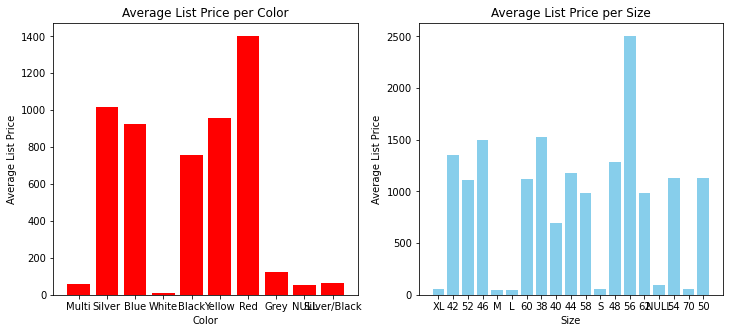

In [0]:
df = rdd1.toDF(header)

# Calculating average list price per color and size
average_price_by_color = df.groupBy("Color").agg({"ListPrice": "avg"}).withColumnRenamed("avg(ListPrice)", "AvgListPrice")
average_price_by_size = df.groupBy("Size").agg({"ListPrice": "avg"}).withColumnRenamed("avg(ListPrice)", "AvgListPrice")

# Converting Spark DataFrame to Pandas for visualization
avg_price_by_color_pd = average_price_by_color.toPandas()
avg_price_by_size_pd = average_price_by_size.toPandas()

# Plotting
plt.figure(figsize=(12, 5))

# Averaging List Price per Color
plt.subplot(1, 2, 1)
plt.bar(avg_price_by_color_pd["Color"], avg_price_by_color_pd["AvgListPrice"], color= 'Red')
plt.title("Average List Price per Color")
plt.xlabel("Color")
plt.ylabel("Average List Price")

# Averaging List Price per Size
plt.subplot(1, 2, 2)
plt.bar(avg_price_by_size_pd["Size"], avg_price_by_size_pd["AvgListPrice"], color='skyblue')
plt.title("Average List Price per Size")
plt.xlabel("Size")
plt.ylabel("Average List Price")

plt.show()

Analyzing the above results we can see that among all the colors, RED color has the highest Price while WHITE color has the lowest sales price. In the second graph, one can observe that highest prize is for the size "56" while size "XL", "M", "L" and "70" has the lowest price. So if a person is finding the cheapest option among all the items, he/she could opt for White color item in "XL", "M", "L" or "70" size.

## 5. Visualize Total Count per Size. Discuss/Explain your results.

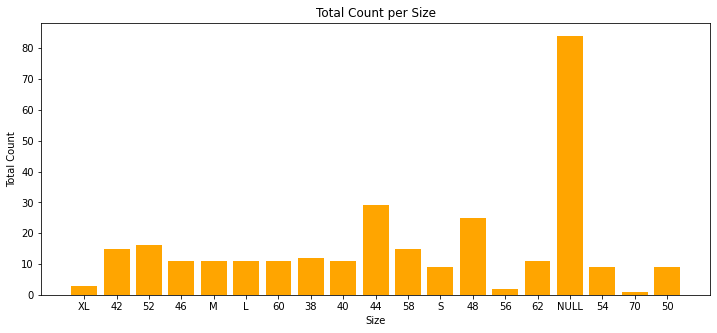

In [0]:
total_count = df.groupBy("Size").count()

# Converting Spark DataFrame to Pandas for visualization
total_count_pd = total_count.toPandas()

# Plotting
plt.figure(figsize=(12, 5))

# Averaging List Price per Size
plt.bar(total_count_pd["Size"], total_count_pd["count"], color='orange')
plt.title("Total Count per Size")
plt.xlabel("Size")
plt.ylabel("Total Count")

plt.show()

While Analysing the above plot one can notice that among all the known sizes the highest stock present is for the size "44" while lowest stock is present for the the count "70". One could argue that since it was one of the cheapest option therefore people are purchasing this size frequently. Likewise, Size "56" and "XL" also has low stock remaining. One could also observe that highest count is of the items whose sizes are unknown. Therefore, a lot of stock has not been labelled/tagged yet.  

# Using Machine Learning Library (For Practice)

In [0]:
dfall = df.select(df.Weight.cast("float"), df.Size.cast("float"), df.ListPrice.cast("float"))
dfall.show(5, truncate=False)

+-------+----+---------+
|Weight |Size|ListPrice|
+-------+----+---------+
|1016.04|58.0|1431.5   |
|1016.04|58.0|1431.5   |
|null   |null|34.99    |
|null   |null|34.99    |
|null   |null|9.5      |
+-------+----+---------+
only showing top 5 rows



In [0]:
dfall = dfall.na.drop("any")

In [0]:
feature_columns = dfall.columns[:-1] # here we omit the final column for prediction
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns,outputCol="features")

In [0]:
data_2 = assembler.transform(dfall)

In [0]:
data_2.show()

+-------+----+---------+--------------------+
| Weight|Size|ListPrice|            features|
+-------+----+---------+--------------------+
|1016.04|58.0|   1431.5|[1016.03997802734...|
|1016.04|58.0|   1431.5|[1016.03997802734...|
|1043.26|62.0|   1431.5|[1043.26000976562...|
| 961.61|44.0|   1431.5|[961.609985351562...|
| 979.75|48.0|   1431.5|       [979.75,48.0]|
|  997.9|52.0|   1431.5|[997.900024414062...|
|1016.04|56.0|   1431.5|[1016.03997802734...|
|1115.83|58.0|   337.22|[1115.82995605468...|
| 1124.9|60.0|   337.22|[1124.90002441406...|
|1133.98|62.0|   337.22|[1133.97998046875...|
|1052.33|44.0|   337.22|[1052.32995605468...|
|1070.47|48.0|   337.22|[1070.46997070312...|
|1088.62|52.0|   337.22|[1088.61999511718...|
|1115.83|58.0|   337.22|[1115.82995605468...|
| 1124.9|60.0|   337.22|[1124.90002441406...|
|1133.98|62.0|   337.22|[1133.97998046875...|
|1006.97|44.0|   594.83|[1006.96997070312...|
|1025.11|48.0|   594.83|[1025.10998535156...|
|1043.26|52.0|   594.83|[1043.2600

In [0]:
from pyspark.ml.regression import LinearRegression

In [0]:
algo = LinearRegression(featuresCol="features", labelCol="ListPrice")

In [0]:
model = algo.fit(data_2)

In [0]:
evaluation_summary = model.evaluate(data_2)

In [0]:
evaluation_summary.rootMeanSquaredError

Out[115]: 862.8415344138203

In [0]:
evaluation_summary.r2

Out[116]: 0.10019389704278814